# Comparison of Different Classifiers: Example Code and Exercises

### Import important libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define functions to generate data and to visualize decision boundaries

In [2]:
def make_toy_data():
    '''
    make_toy_data generates synthetic data for the cancer classification task.
    
    input: None
    returns: 
       x_train - an numpy array of size 737 x 2, each row is a patient, each column is a biomarker
       x_test - an numpy array of size 363 x 2, each row is a patient, each column is a biomarker
       y_train - an numpy array of length 737, each entry is either 0 (no cancer) or 1 (cancerous)
       y_test - an numpy array of length 363, each entry is either 0 (no cancer) or 1 (cancerous)
    '''
    
    class_0_size = 1000
    mu_0 = np.array([10, 15])
    Sigma_0 = np.array([[50, -30], 
                        [-30, 80]])
    class_0 = np.random.multivariate_normal(mu_0, Sigma_0, size=class_0_size)

    class_1_size = 100
    mu_1 = np.array([22, 6])
    Sigma_1 = np.array([[20, 5], 
                        [5, 20]])
    class_1 = np.random.multivariate_normal(mu_1, Sigma_1, size=class_1_size)
    
    x = np.vstack((class_0, class_1))
    y = np.hstack((np.zeros(class_0_size), np.ones(class_1_size)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    return x_train, x_test, y_train, y_test

def scatter_plot_data(x, y, ax):
    '''
    scatter_plot_data scatter plots the patient data. A point in the plot is colored 'red' if cancerous 
    and blue otherwise.
    
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='blue', label='class 0')
    ax.set_xlim((-20, 40))
    ax.set_ylim((-20, 40))
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x, y, model, ax, poly_degree=1):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
    returns: 
       ax - the axis with the scatter plot
    
    '''
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='blue', label='class 0')
    
    # Create mesh
    interval = np.arange(-20, 40, 0.5)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_degree > 1):
        polynomial_features = PolynomialFeatures(degree=poly_degree)
        xx = polynomial_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='bwr')
    ax.contour(x1, x2, yy, colors='black', linewidths=0.2)
    ax.set_xlim((-20, 40))
    ax.set_ylim((-20, 40))
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    ax.legend(loc='best')
    return ax

---

# Application: Cancer Diagnosis Based on Biopsy Markers

In this problem, we consider the task of classifying whether or not a patient has a rare and aggressive type of skin cancer based on two biomarkers extracted from biopsies of skin samples.

### 1. Make a toy training and testing classification data set 

We generate toy data for this application. `x` is a an array where each row represents a patient and each column represents a biomarker. `y` is an array of `0`'s and `1`'s, where `0` indicates absence of cancer and `1` indicates presence of cancer.

In [3]:
x_train, x_test, y_train, y_test = make_toy_data()

In [4]:
print('Number of patients:', x_train.shape[0])
print('Number of features:', x_train.shape[1])

Number of patients: 737
Number of features: 2


### 2. Fit a `sklearn` logistic regression model to the training data

In [5]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3. Evaluate the model in terms of train and test accuracy

In [6]:
print('Training accuracy of linear logistic regression:', logistic.score(x_train, y_train))
print('Testing accuracy of linear logistic regression:', logistic.score(x_test, y_test))

Training accuracy of linear logistic regression: 0.9050203527815468
Testing accuracy of linear logistic regression: 0.9173553719008265


The training and the testing accuracy are both high! So this must mean that our model is doing a really good job right?

### 4. Visualize the data and the decision boundary of the logistic regression model

Since this data is two dimensional we can visualize the data as well as the decision boundary.

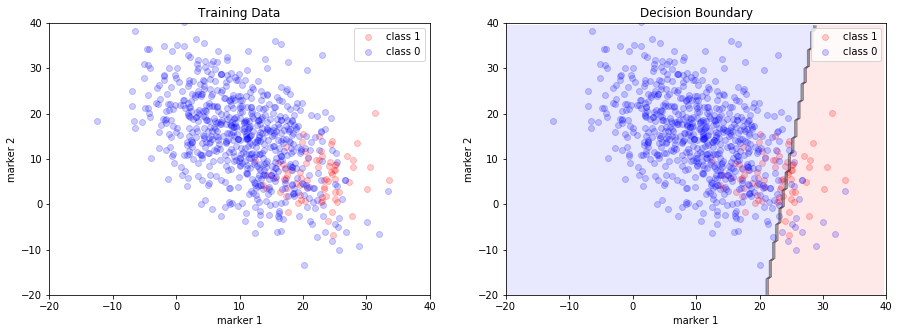

In [7]:
degree_of_polynomial = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

plot_decision_boundary(x_train, y_train, logistic, ax[1], degree_of_polynomial)
ax[1].set_title('Decision Boundary')
plt.show()

Based on the above visualizations, how well do you think our model is doing at diagnosing cancer? Does this conclusion agree with the one you made after looking at the train/test accuracy?

Do you feel comfortable deploying this model to diagnose real life patients? Why or why not?

### Evaluate the mode's performance for each type of patient
Using `sklearn`'s confusion matrix function, we can compute the number of patients correctly classified for each class: cancer free (`y=1`) and cancerous (`y=0`).

In [8]:
y_pred = logistic.predict(x_test)
print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_pred))

Confusion matrix for the classification on test:
 [[328  10]
 [ 20   5]]


How does the confusion matrix relate to your analysis of the decision boundary? Which metric is better for evaluating our model for this dataset: accuracy or the confusion matrix? Why?

---

## Exercise: compare the performance of different classifiers on this dataset

### 1. Logistic regression with quadratic boundary

Fit a logistic regression with quadratic boundary on this dataset, visualize the decision boundaries and compute train/test accuracy as well as the confusion matrix.

**Hint:** you need to first transform your `x_test` and `x_train` using `sklearn`'s `PolynomialFeatures`.

### Solution to 1:

In [9]:
# #transform your training and testing data into polynomial features
# polynomial_features = PolynomialFeatures(2)
# polynomial_features.fit(x_train)
# x_train_poly = polynomial_features.transform(x_train)
# x_test_poly = polynomial_features.transform(x_test)

# #fit a logistic regression on top of your polynomial features
# logistic_poly = LogisticRegression(solver='lbfgs', max_iter=1000)
# logistic_poly.fit(x_train_poly, y_train)

# #visualize the decision boundary
# degree_of_polynomial = 2

# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# scatter_plot_data(x_train, y_train, ax[0])
# ax[0].set_title('Training Data')

# plot_decision_boundary(x_train, y_train, logistic_poly, ax[1], degree_of_polynomial)
# ax[1].set_title('Decision Boundary for Quadraic Logistic Regression')
# plt.show()

In [10]:
# print('Training accuracy of quadratic logistic regression:', logistic_poly.score(x_train_poly, y_train))
# print('Testing accuracy of quadratic logistic regression:', logistic_poly.score(x_test_poly, y_test))
# y_pred = logistic_poly.predict(x_test_poly)
# print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_pred))

### 2. Decision tree

Fit a decision tree on this dataset, visualize the decision boundaries and compute train/test accuracy as well as the confusion matrix.

Try a couple of different depths.

### Solution to 2:

In [11]:
# #fit a decision tree
# tree = DecisionTree(max_depth=10)
# tree.fit(x_train, y_train)

# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# scatter_plot_data(x_train, y_train, ax[0])
# ax[0].set_title('Training Data')

# plot_decision_boundary(x_train, y_train, tree, ax[1])
# ax[1].set_title('Decision Boundary of Decision Tree')
# plt.show()

In [12]:
# print('Training accuracy of decision tree:', tree.score(x_train, y_train))
# print('Testing accuracy of decision tree:', tree.score(x_test, y_test))
# y_pred = tree.predict(x_test)
# print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_pred))

### 3. Random Forest
Fit a random forest on this dataset, visualize the decision boundaries and compute train/test accuracy as well as the confusion matrix.

In [13]:
# #fit a random forest
# forest = RandomForest(n_estimators=1000)
# forest.fit(x_train, y_train)

# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# scatter_plot_data(x_train, y_train, ax[0])
# ax[0].set_title('Training Data')

# plot_decision_boundary(x_train, y_train, forest, ax[1])
# ax[1].set_title('Decision Boundary of Random Forest')
# plt.show()

In [14]:
# print('Training accuracy of random forest:', forest.score(x_train, y_train))
# print('Testing accuracy of random forest:', forest.score(x_test, y_test))
# y_pred = forest.predict(x_test)
# print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_pred))

### 4. kNN Classifier
Fit a kNN Classifier on this dataset, visualize the decision boundaries and compute train/test accuracy as well as the confusion matrix.

Try a couple of values of `k`.

In [15]:
# #fit a kNN classifier
# knn = KNN(n_neighbors=5)
# knn.fit(x_train, y_train)

# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# scatter_plot_data(x_train, y_train, ax[0])
# ax[0].set_title('Training Data')

# plot_decision_boundary(x_train, y_train, knn, ax[1])
# ax[1].set_title('Decision Boundary of KNN')
# plt.show()

In [16]:
# print('Training accuracy of knn:', knn.score(x_train, y_train))
# print('Testing accuracy of knn:', knn.score(x_test, y_test))
# y_pred = knn.predict(x_test)
# print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_pred))

### 5. Compare your models
Which model is most appropriate for this dataset and this application? Fully justify your answer.

Hypothesize on why certain models are well suited for this task while other are less so.